# Question 2 - Analysis 1
- get the most frequent words in titles of most viewed articles
- in order to know what words really catch readers' eyes when they browse the website

In [2]:
import json
import requests
import os
import glob
import collections
import re
from nltk.corpus import stopwords                       
import matplotlib.pyplot as plt

## Next block is for data download, please skip it

In [42]:
nyt_most_popular_key = os.getenv('auth_key')
for i in range(86):
    num = i*20
    url = 'http://api.nytimes.com/svc/mostpopular/v2/mostviewed/all-sections/7.json?date=2008-01-02&offset='+str(num)+'&api-key='+nyt_most_popular_key
    resp = requests.get(url)
    data = json.loads(resp.text)
    with open('../data/most_viewed/'+str(i+1)+'.json', 'w') as outfile:
        json.dump(data, outfile)                        # get the dataset of most viewed articles via NYT API       

In [3]:
filepaths = glob.glob("../data/most_viewed/*.json", recursive = True)
title_list = []
for name in filepaths:
    with open(name) as file:
        data = json.load(file)
        for i in range(len(data['results'])):
            title = data['results'][i]['title']        # get all the titles from dataset and put them in a list
            title_list.append(title)

In [4]:
def get_words(text):
    return re.compile('[A-Za-z]+').findall(text)       # define a function to get all the words from a text

In [5]:
word_freq = collections.Counter()
for title in title_list:
    for word in get_words(title):
        word = word.lower()
        if(word not in stopwords.words('english')):    # use nltk's corpus - stopwords 
            word_freq[word] += 1                       # use counter to calculate word frequency
data = []
labels = []
for word in word_freq.most_common()[:10]:              # get top 10 words
    data.append(word[1])
    labels.append(word[0])

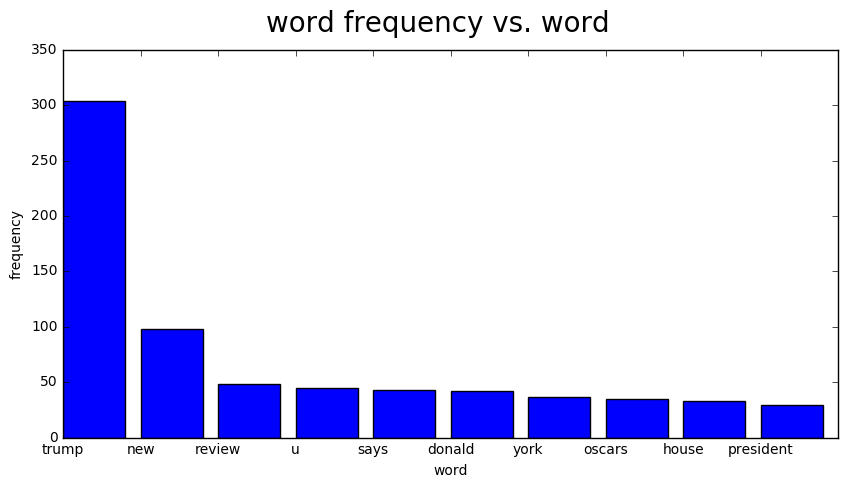

In [11]:
plt.figure(figsize=(10,5))                             # use pyplot to plot bar chart
plt.suptitle('word frequency vs. word', fontsize=20)
plt.ylabel('frequency')
plt.xlabel('word')
plt.bar(range(len(data)), data, tick_label=labels)
plt.savefig('ana_1/ana_1.png')
plt.show()  